In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis for Nobel prize data
## Prepared by: Abdelrahman Aboubakr

In [135]:
df = pd.read_csv('Nobel.csv')

# Showing the data

In [136]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# How many Nobel prize have been earned for people who born in Egypt and details

In [108]:
print(f"{df['Birth Country'].value_counts()['Egypt']} People have been earned Nobel prize were born in Egypt ")

6 People have been earned Nobel prize were born in Egypt 


In [95]:
df[df['Birth Country']=='Egypt']

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
370,1964,Chemistry,The Nobel Prize in Chemistry 1964,"""for her determinations by X-ray techniques of...",1/1,230,Individual,Dorothy Crowfoot Hodgkin,1910-05-12,Cairo,Egypt,Female,"University of Oxford, Royal Society",Oxford,United Kingdom,1994-07-29,Shipston-on-Stour,United Kingdom
508,1978,Peace,The Nobel Peace Prize 1978,NaN,1/2,538,Individual,Mohamed Anwar al-Sadat,1918-12-25,Mit Abu al-Kawm,Egypt,Male,NaN,NaN,NaN,1981-10-06,Cairo,Egypt
606,1988,Literature,The Nobel Prize in Literature 1988,"""who, through works rich in nuance - now clear...",1/1,665,Individual,Naguib Mahfouz,1911-12-11,Cairo,Egypt,Male,NaN,NaN,NaN,2006-08-30,Cairo,Egypt
668,1994,Peace,The Nobel Peace Prize 1994,"""for their efforts to create peace in the Midd...",1/3,557,Individual,Yasser Arafat,1929-08-24,Cairo,Egypt,Male,NaN,NaN,NaN,2004-11-11,NaN,NaN
723,1999,Chemistry,The Nobel Prize in Chemistry 1999,"""for his studies of the transition states of c...",1/1,292,Individual,Ahmed H. Zewail,1946-02-26,Damanhur,Egypt,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,2016-08-02,NaN,NaN
809,2005,Peace,The Nobel Peace Prize 2005,"""for their efforts to prevent nuclear energy f...",1/2,798,Individual,Mohamed ElBaradei,1942-06-17,Cairo,Egypt,Male,NaN,NaN,NaN,NaN,NaN,NaN


# Next will be showing a plot illustrates the countries that have been earned the prize with count plot

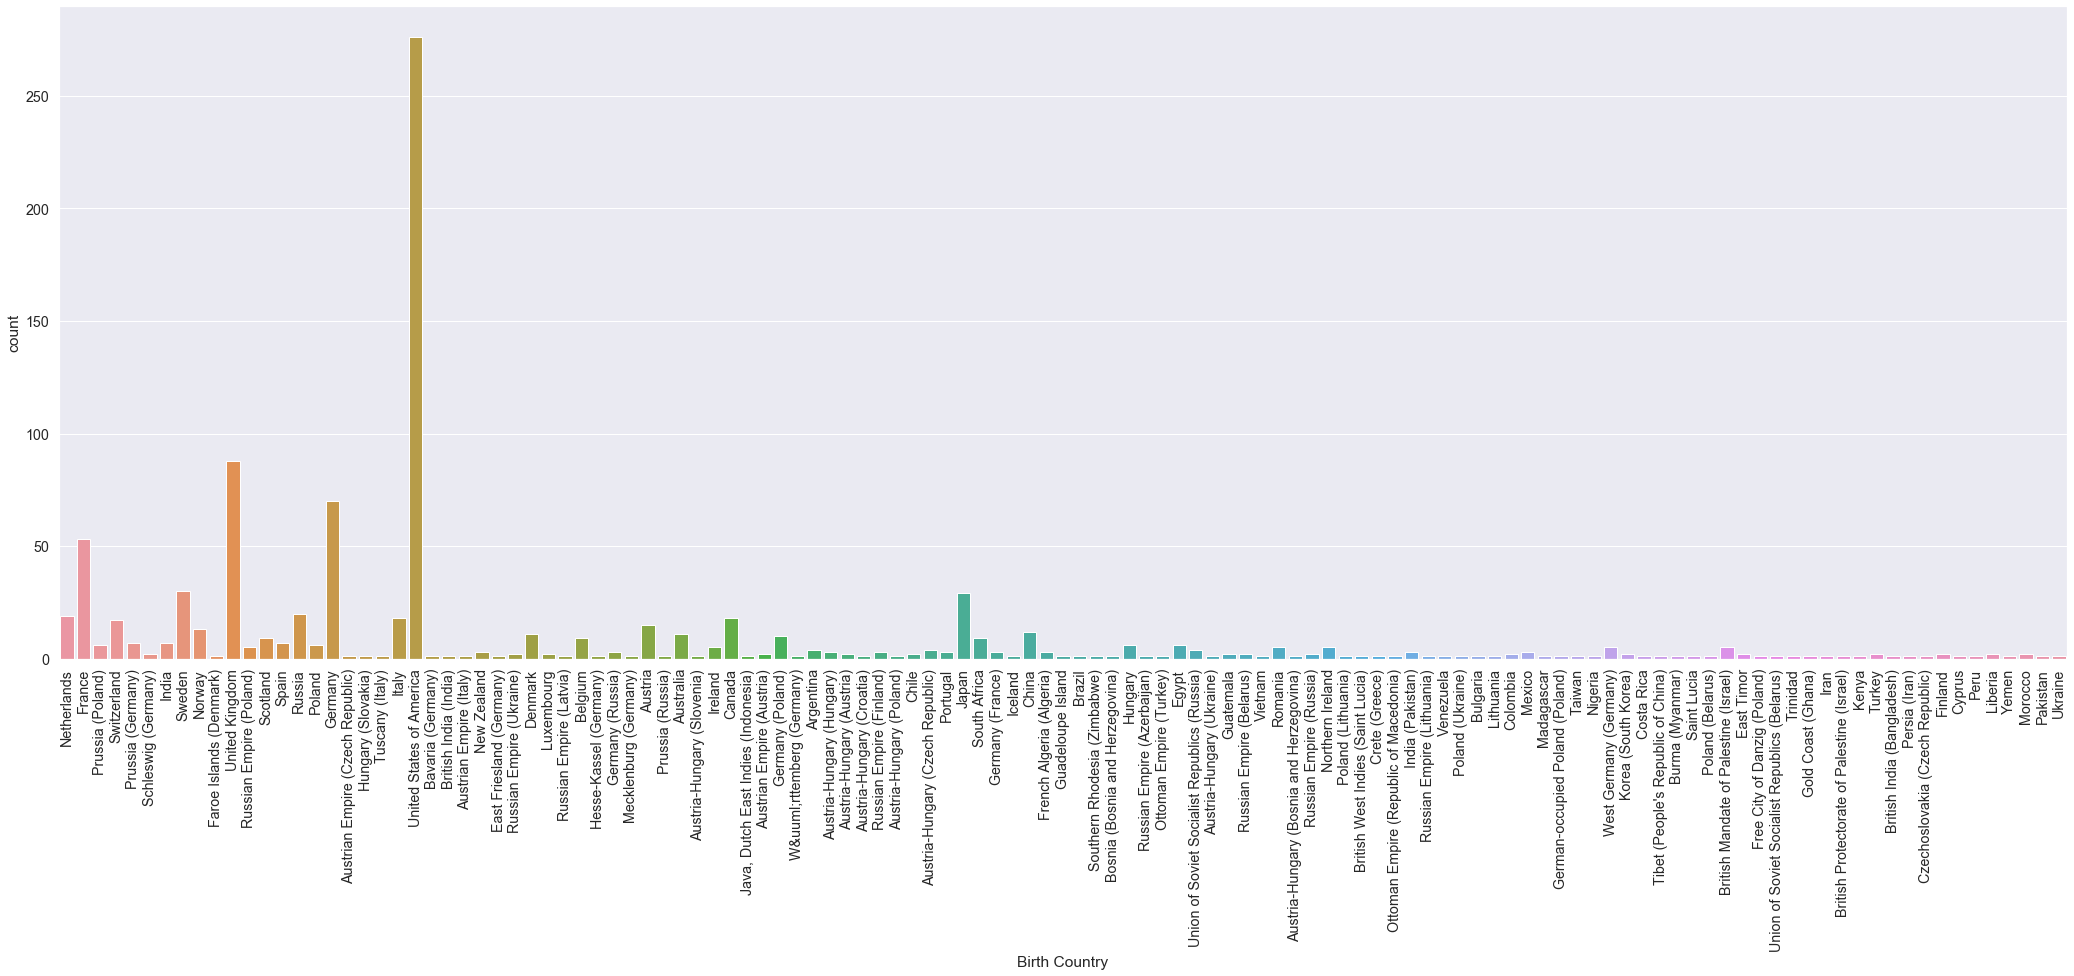

In [60]:
sns.set(rc={'figure.figsize':[36,12]}, font_scale=1.3)
plt.xticks(rotation=90)
sns.countplot(df['Birth Country'])

# Who are the most five countries earned the prize

In [80]:
df['Birth Country'].value_counts().head(5) 

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Name: Birth Country, dtype: int64

# Next plot showing the categories plot 

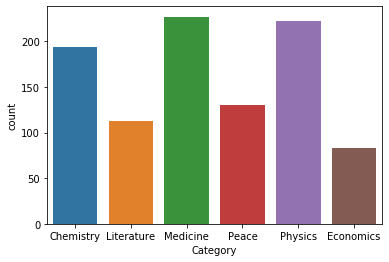

In [7]:
sns.countplot(df['Category'])

# Category start and end times using box plot

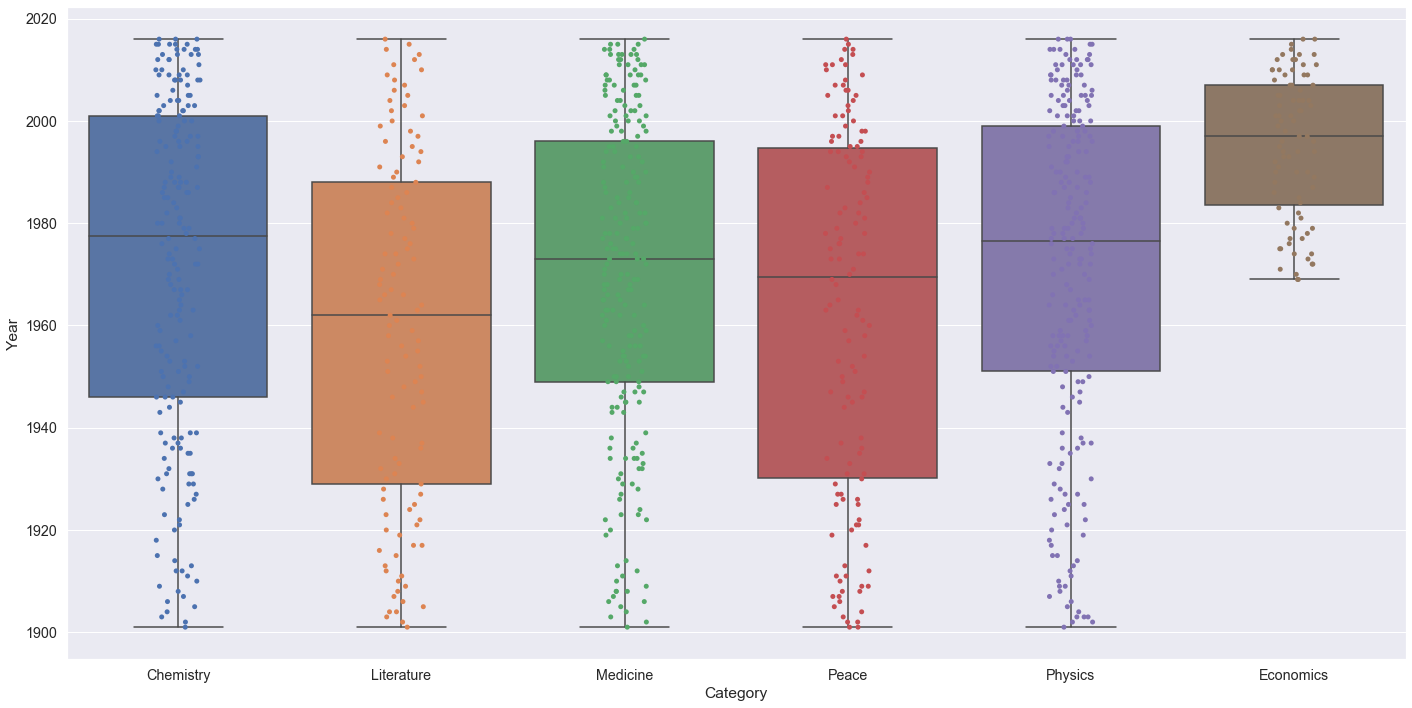

In [56]:
sns.set(rc={'figure.figsize':[24,12]}, font_scale=1.3)

sns.boxplot(x = 'Category', y = 'Year' , data= df)
sns.stripplot(x = 'Category', y = 'Year' , data= df)

# Number of individual prizes VS. organization

In [61]:
df['Laureate Type'].unique()

array(['Individual', 'Organization'], dtype=object)

In [82]:
df['Laureate Type'].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

# Adding anew column describes the prize share with float value rather than string then dropping the old column

In [157]:
df['Prize Share 1'] = df ['Prize Share'].apply(lambda x:x.split('/')[0])
df['Prize Share 2'] = df ['Prize Share'].apply(lambda x:x.split('/')[1])

df['Prize Share 1']=pd.to_numeric(df['Prize Share 1'],errors='coerce')
df['Prize Share 2']=pd.to_numeric(df['Prize Share 2'],errors='coerce')
df['Prize Share New'] = df['Prize Share 1'] / df['Prize Share 2'] 

df.drop('Prize Share 1',axis = 1 , inplace = True)
df.drop('Prize Share 2',axis = 1 , inplace = True)
df.drop('Prize Share',axis = 1 , inplace = True)
df.head()

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Prize Share New
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,0.5
4,1901,Peace,The Nobel Peace Prize 1901,NaN,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,0.5


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  969 non-null    int64  
 1   Category              969 non-null    object 
 2   Prize                 969 non-null    object 
 3   Motivation            881 non-null    object 
 4   Laureate ID           969 non-null    int64  
 5   Laureate Type         969 non-null    object 
 6   Full Name             969 non-null    object 
 7   Birth Date            940 non-null    object 
 8   Birth City            941 non-null    object 
 9   Birth Country         943 non-null    object 
 10  Sex                   943 non-null    object 
 11  Organization Name     722 non-null    object 
 12  Organization City     716 non-null    object 
 13  Organization Country  716 non-null    object 
 14  Death Date            617 non-null    object 
 15  Death City            5

# Converting category column from categorical to numerical

In [163]:
cat_dict = {'Medicine':1 , 'Physics' : 2 , 'Chemistry' : 3 , 'Literature' : 3, 'Economy' : 4 , 'Peace' : 5 }
df['Category_Num'] = df['Category'].map(cat_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  969 non-null    int64  
 1   Category              969 non-null    object 
 2   Prize                 969 non-null    object 
 3   Motivation            881 non-null    object 
 4   Laureate ID           969 non-null    int64  
 5   Laureate Type         969 non-null    object 
 6   Full Name             969 non-null    object 
 7   Birth Date            940 non-null    object 
 8   Birth City            941 non-null    object 
 9   Birth Country         943 non-null    object 
 10  Sex                   943 non-null    object 
 11  Organization Name     722 non-null    object 
 12  Organization City     716 non-null    object 
 13  Organization Country  716 non-null    object 
 14  Death Date            617 non-null    object 
 15  Death City            5

# Plot showing the most category with individual prize which is chemistry

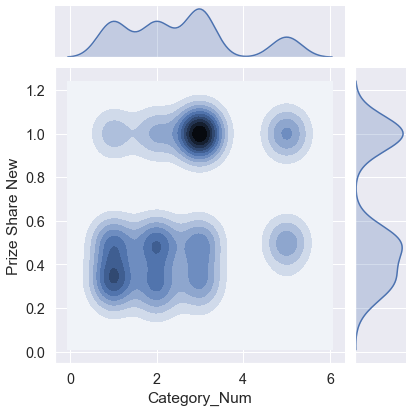

In [171]:
sns.jointplot(x = 'Category_Num', y='Prize Share New', data =df, kind='kde')

# Thanks